<a href="https://colab.research.google.com/github/oObelix/DataScience/blob/master/Jun_ML_Clusterization_HW_7_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Урок 4. Домашнее задание 

### 4.1 Домашнее задание начального уровня

Потренируйтесь в программировании на python. Надо будет найти расстояние от каждой точки из массива $X$ до центра кластера, а потом просуммировать эти расстояния. Это будет реализацией библиотечной функции `sklearn.metrics.pairwise.euclidean_distances` из первого урока.  В итоге у Вас должно получиться число чуть более $16$ - это и будет расстояние.
$$
\sum_{i=1}^{k} \mid x_i - c \mid
$$

где для одного обучающего примера x, состоящего из двух координат:
$$
\mid x - c \mid = (x_1-c_1)^2 + (x_2-c_2)^2
$$

**Примечание** Как вы уже знаете из урока про линейную регрессию, в этой формуле должен быть квадратный корень, но для скорости работы мы опускаем его.

**Подсказка** Средствами библиотеки numpy реализуйте формулу нахождения суммы внутрикластерных расстояний

In [ ]:
import numpy as np

clust = np.array([
 [-0.5972191612445694, -0.5919098916910581],
 [-1.5838020751869848, 0.4743393635868491],
 [-1.892642118066139, -1.2770390481464395],
 [-1.021761443519372, -0.38446059106320013],
 [-0.628271339507516, -2.308149346281125],
 [-0.7180915776856387, 1.1805550909358404],
 [-1.543143767548152, -1.4163791359687334],
 [0.022103701018375554, -1.1279478858865397],
 [-0.7776518874305778, -0.4157532453316538],
 [-1.2073577296008344, -1.1308523658604184]
])

centroid = np.array([-0.9774245525274352, -0.032635425821084516])

# -- ВАШ КОД ТУТ --


# np.linalg.norm(clust - centroid)
# np.linalg.norm(clust - centroid)**2

sum([(xi[0]-centroid[0])**2 + (xi[1]-centroid[1])**2  for xi in clust])
np.array([(xi[0]-centroid[0])**2 + (xi[1]-centroid[1])**2 for xi in clust]).sum()


16.31211696438564

### 4.2 Домашнее задание начального уровня  

Обучите алгоритм k-средних для количества кластеров $n=3$ на том же датасете, который содержится в файле `data/clustering.pkl`. Визуализируйте результат:

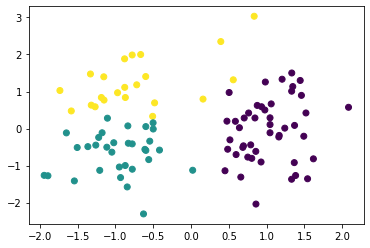

In [ ]:
# -- ВАШ КОД ТУТ --

import pickle

with open('sample_data/clustering.pkl', 'rb') as f:
  clustering = pickle.load(f)

clustering

X = np.array(clustering['X'])
# y = np.array(clustering['Y'])

from sklearn.cluster import KMeans

km_model = KMeans(n_clusters=3)
km_model.fit(X)

from matplotlib import pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=km_model.labels_)
plt.show()


### 4.3 Домашнее задание высокого уровня

Мы узнали про эвристику, улучшающую алгоритм: запустить несколько раз алгоритм, запомнить, куда попали центроиды при каждом запуске, а потом усреднить координаты за все несколько запуска.

Попробуйте применить эту эвристику на практике: 

* используйте 10 запусков алгоритма $k$-средних для $k=2$ с параметрами
<pre>
kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)
</pre>
* в каждом запуске сохраняйте координаты центроидов общий массив $c$. См. `cluster_centers_ : array, [n_clusters, n_features]`
* визуализируйте координаты точек из $c$ на фоне исходного множества точек

Результат будет примерно такой:
![several_init_knn](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/several_init_knn.png)

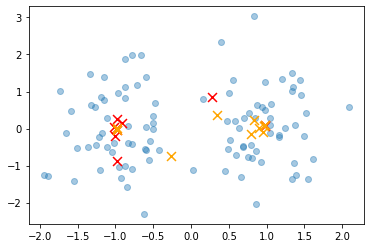

In [ ]:
# -- ВАШ КОД ТУТ --

plt.scatter(X[:, 0], X[:, 1], alpha=.4)

cluster0_centr = []
cluster1_centr = []
for i in range(10):
  km_model = KMeans(n_clusters=2, n_init=1, random_state=None, 
                    algorithm='full', max_iter=2)
  km_model.fit(X)
  # print(km_model.cluster_centers_)
  cluster0_centr.append(km_model.cluster_centers_[0])
  cluster1_centr.append(km_model.cluster_centers_[1])

cluster0_centr = np.array(cluster0_centr)
cluster1_centr = np.array(cluster1_centr)

plt.scatter(cluster0_centr[:, 0], cluster0_centr[:, 1], c='red', s=80, marker='x')
plt.scatter(cluster1_centr[:, 0], cluster1_centr[:, 1], c='orange', s=80, marker='x')

plt.show()

Мы выяснили, что один из недостатков алгоритма k-средних состоит в том, что количество кластеров надо задать до тренировки модели, но как же определить, сколько будет кластеров в данных? Для этой задачи существует эффективный алгоритм, о котором мы поговорим в следующем уроке.